In [68]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial


In [69]:
#REGLA DE CONTEO PARA COMBINACIONES
def Conteo_combinaciones(N = 1,n =1):
    return(factorial(N)/(factorial(n)*factorial(N-n)))

In [70]:
#REGLA DE CONTEO PARA PERMUTACIONES
def Conteo_permutaciones(N = 1,n =1):
    return(factorial(N)/factorial(N-n))

In [71]:
def Poisson(lamb,k):
    from math import e
    coef = (e**(-lamb))*(lamb**k)
    den = factorial(k)
    return(coef/den)

In [72]:
def convert_ratio(r1,r2):
    '''
    La funcion convert_ratio realiza la conversion de tasas de frecuencia para una distribución de Poisson
    r1: tasa original de ocurrencia de eventos.
    r2: nueva frecuencia a la que se desea evaluar.
    '''
    return(r1*r2)

In [73]:
def Binomial(n,p,x):
    '''
    n : Poblacion/EnsayosTotales
    p : muestra/EnsayosARealizar
    x : prob. de éxito
    '''
    coef_bin = Conteo_combinaciones(N=n,n=x)
    p_x = p**x
    p_neg = (1-p)**(n-x)
    return(coef_bin*p_x*p_neg)

In [74]:
def Hipergeom(N=None,k=None,n=None,x=None):
    f1 = Conteo_combinaciones(N=k,n=x)
    f2 = Conteo_combinaciones(N=N-k,n=n-x)
    f3 = Conteo_combinaciones(N=N,n=n)
    return (f1*f2)/f3

# Homework 4 - Distribución de probabilidad

## 1.
Considera el experimento que consiste en un empleado que arma un producto.

- a. Defina la variable aleatoria que represente el tiempo en minutos requerido para armar el producto.<br>
Respuesta:<br><br>
X

- b. ¿Qué valores toma la variable aleatoria?<br>
Respuesta:<br><br>
X = 0,1,2,3,4,5...n


- c. ¿Es una variable aleatoria discreta o continua?<br>
Respuesta:<br>
Es una variable continua (representada en valores discretos para mayor entendimiento)

## 2. 
Considera el experimento que consiste en lanzar una moneda dos veces.

- a. Enumere los resultados experimentales.<br><br>
S = {(C,C),(C,S),(S,C),(S,S)}

- b. Defina una variable aleatoria que represente el número de caras en los dos lanzamientos.<br><br>
X = {(C,C),(C,S),(S,C)}

- c. Dé el valor que la variable aleatoria tomará en cada uno de los resultados experimentales.<br><br>
X = [0,1]

- d. ¿Es una variable aleatoria discreta o continua?<br><br>
Es discreta

## 3. 
Considera las decisiones de compra de los próximos tres clientes que lleguen a la tienda de ropa Martin Clothing Store. De acuerdo con la experiencia, el gerente de la tienda estima que la probabilidad de que un cliente realice una compra es 0.30.

- a Cumple con un experimento binomial 
- El experimento consiste en una serie de n ensayos idénticos; tiene dos resultados posibles; los eventos son independientes.

- b ¿Cuál es la probabilidad de que dos de los próximos tres clientes realicen una compra?

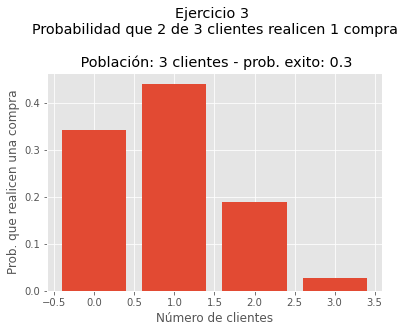

La probabilidad de que 2 de 3 clientes realicen 1 compra es: 0.189


In [202]:
resultado = Binomial(n=3,x=2,p=0.3)

# make data
x = np.linspace(0, 3, 4)
y = [Binomial(n=3,x=i,p=0.3)   for i in range(4)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 3 \nProbabilidad que 2 de 3 clientes realicen 1 compra\n\n Población: 3 clientes - prob. exito: 0.3')
plt.xlabel('Número de clientes')
plt.ylabel('Prob. que realicen una compra')
plt.bar(x, y,width=0.8)
plt.show()

print('La probabilidad de que 2 de 3 clientes realicen 1 compra es:',resultado)

- c. ¿Cuál es la probabilidad de que cuatro de los próximos diez clientes realicen una compra?

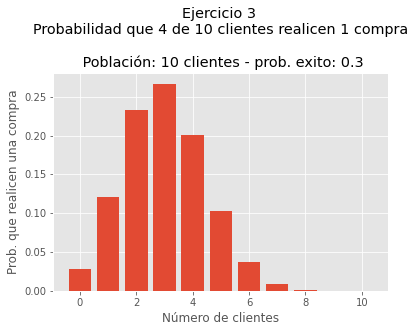

La probabilidad de que 4 de 10 clientes compren es: 0.2001209489999999


In [205]:
resultado = Binomial(n=10,x=4,p=0.3)

# make data
x = np.linspace(0, 10, 11)
y = [Binomial(n=10,x=i,p=0.3)   for i in range(11)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 3 \nProbabilidad que 4 de 10 clientes realicen 1 compra\n\n Población: 10 clientes - prob. exito: 0.3')
plt.xlabel('Número de clientes')
plt.ylabel('Prob. que realicen una compra')
plt.bar(x, y,width=0.8)
plt.show()

print('La probabilidad de que 4 de 10 clientes compren es:',resultado)

## 4. 
A la oficina de reservaciones de una aerolínea regional llegan 48 llamadas por hora.

- a. Calcule la probabilidad de recibir cinco llamadas en un lapso de 5 minutos.

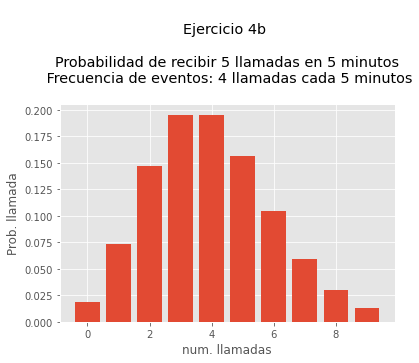

Tasa de llamadas: 4 llamadas en 5 minutos
Probabilidad de recibir 5 llamadas en 5 min: 0.15629345185053173


In [195]:
lambd = convert_ratio(48/60,5) #ajustamos lambda a la nueva frecuencia
respuesta = Poisson(lambd,5)

# make data
x = np.linspace(0, 9, 10)
y = [Poisson(lambd,i)   for i in range(10)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('\nEjercicio 4b \n\nProbabilidad de recibir 5 llamadas en 5 minutos\n Frecuencia de eventos: 4 llamadas cada 5 minutos\n')
plt.xlabel('num. llamadas')
plt.ylabel('Prob. llamada')
plt.bar(x, y, linewidth=3.0)
plt.show()
print('Tasa de llamadas:',round(lambd),'llamadas en 5 minutos')
print('Probabilidad de recibir 5 llamadas en 5 min:',respuesta)

- b. Estime la probabilidad de recibir exactamente 10 llamadas en un lapso de 15 minutos.

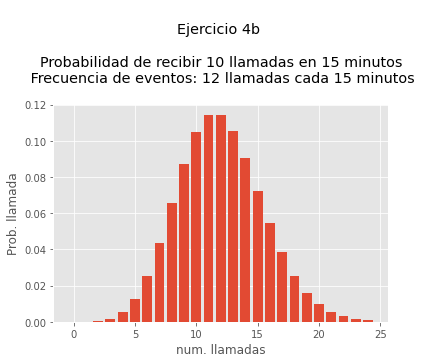

Tasa de llamadas: 12 llamadas en 15 minutos
Probabilidad de recibir 10 llamadas en 5 min: 0.1048


In [192]:
lambd = convert_ratio(48/60,15) #Cambiamos lambda a la nueva frecuencia (regla de 3 simple)
respuesta = Poisson(lambd,10)


# make data
x = np.linspace(0, 24, 25)
y = [Poisson(lambd,i)   for i in range(25)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('\nEjercicio 4b \n\nProbabilidad de recibir 10 llamadas en 15 minutos\n Frecuencia de eventos: 12 llamadas cada 15 minutos\n')
plt.xlabel('num. llamadas')
plt.ylabel('Prob. llamada')
plt.bar(x, y, linewidth=3.0)
plt.show()

print('Tasa de llamadas:',round(lambd),'llamadas en 15 minutos')
print('Probabilidad de recibir 10 llamadas en 5 min:',round(respuesta,4))

c. Suponga que no hay ninguna llamada en espera. Si el agente de viajes necesitará 5 minutos para la llamada que está atendiendo 
  - ¿Cuántas llamadas habrá en espera para cuando él termine? 
  - ¿Cuál es la probabilidad de que no haya ninguna llamada en espera?

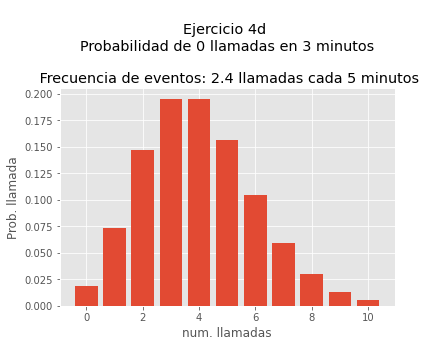

Habran 4 llamadas en 5 minutos
Probabilidad de recibir 0 llamadas en 3 min: 0.0183


In [206]:
lambd = convert_ratio(48/60,5) # Cambiamos lambda a la nueva frecuencia (regla de 3 simple)
resultado = Poisson(lambd,0) # Probabilidad de 0 llamadas  en 5 minutos

# make data
x = np.linspace(0, 10, 11)
y = [Poisson(lambd,i)   for i in range(11)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('\nEjercicio 4d \nProbabilidad de 0 llamadas en 3 minutos\n\n Frecuencia de eventos: 2.4 llamadas cada 5 minutos')
plt.xlabel('num. llamadas')
plt.ylabel('Prob. llamada')
plt.bar(x, y, linewidth=3.0)
plt.show()

print('Habran',round(lambd),'llamadas en 5 minutos')
print('Probabilidad de recibir 0 llamadas en 3 min:',round(resultado,4))



d. Si en este momento no hay ninguna llamada, ¿cuál es la probabilidad de que el agente de viajes pueda tomar 3 minutos de descanso sin ser interrumpido por una llamada?

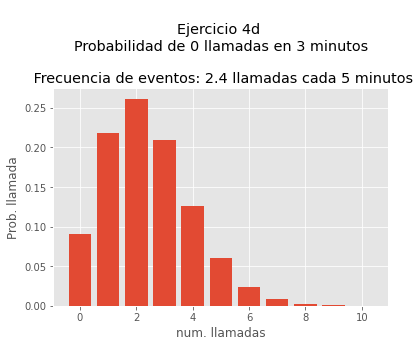

Probabilidad de recibir 0 llamadas en 3 min: 0.09071795328941248


In [207]:
lambd = convert_ratio(48/60,3) # Cambiamos lambda a la nueva frecuencia (regla de 3 simple)
resultado = Poisson(lambd,0)

# make data
x = np.linspace(0, 10, 11)
y = [Poisson(lambd,i)   for i in range(11)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('\nEjercicio 4d \nProbabilidad de 0 llamadas en 3 minutos\n\n Frecuencia de eventos: 2.4 llamadas cada 5 minutos')
plt.xlabel('num. llamadas')
plt.ylabel('Prob. llamada')
plt.bar(x, y, linewidth=3.0)
plt.show()
print('Probabilidad de recibir 0 llamadas en 3 min:',resultado)

## 5.
En una encuesta realizada por Gallup Organization, se les preguntó a los interrogados, “Cuál es el deporte que prefieres ver”. Futbol y básquetbol ocuparon el primero y segundo lugar de preferencia (www.gallup.com, 3 de enero de 2004). Si en un grupo de 10 individuos, siete prefieren futbol y tres prefieren básquetbol. Se toma una muestra aleatoria de tres de estas personas.  

a)  ¿Cuál es la probabilidad de que exactamente dos prefieren el futbol?

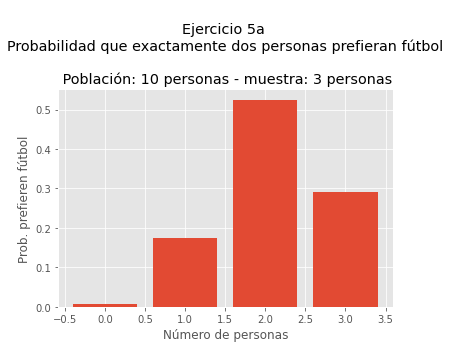

Probabilidad de que exactamente dos prefieren el fútbol: 0.525


In [126]:
resultado = Hipergeom(N=10,k=7,n=3,x=2)

# make data
x = np.linspace(0, 3, 4)
y = [Hipergeom(N=10,k=7,n=3,x=i)  for i in range(4)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('\nEjercicio 5a \nProbabilidad que exactamente dos personas prefieran fútbol\n\n Población: 10 personas - muestra: 3 personas')
plt.xlabel('Número de personas')
plt.ylabel('Prob. prefieren fútbol')
plt.bar(x, y, width=0.8)
plt.show()
print('Probabilidad de que exactamente dos prefieren el fútbol:',resultado)


b) ¿De que la mayoría (ya sean dos o tres) prefiere el futbol?

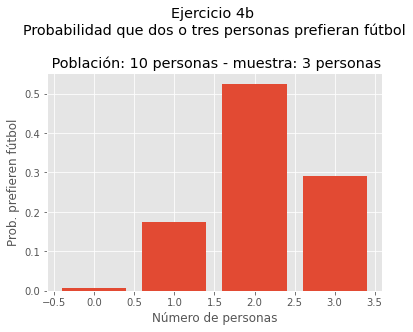

Probabilidad de que dos o tres personas prefieran fútbol: 0.8166666666666667


In [120]:
resultado = Hipergeom(N=10,k=7,n=3,x=2) + Hipergeom(N=10,k=7,n=3,x=3)

# make data
x = np.linspace(0, 3, 4)
y = [Hipergeom(N=10,k=7,n=3,x=i)  for i in range(4)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 4b \nProbabilidad que dos o tres personas prefieran fútbol\n\n Población: 10 personas - muestra: 3 personas')
plt.xlabel('Número de personas')
plt.ylabel('Prob. prefieren fútbol')
plt.bar(x, y, width=0.8)
plt.show()
print('Probabilidad de que dos o tres personas prefieran fútbol:',resultado)

## 6.
La probabilidad de que a un estudiante le guste este modulo es de 0.7 (en Henry somos optimistas), cual es la probabilidad de que les guste este módulo a 6 de los 10 estudiantes.

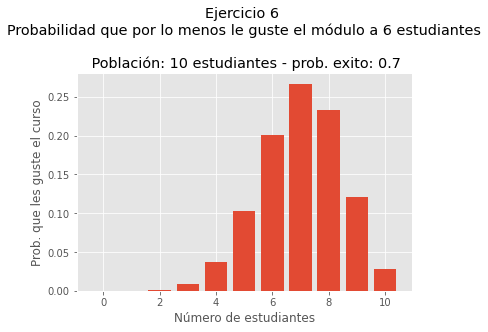

La probabilidad que el módulo agrade a 6 estudiantes: 0.200121


In [208]:
resultado = Binomial(n=10,p=0.7,x=6)

# make data
x = np.linspace(0, 10, 11)
y = [Binomial(n=10,x=i,p=0.7)   for i in range(11)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 6 \nProbabilidad que por lo menos le guste el módulo a 6 estudiantes\n\n Población: 10 estudiantes - prob. exito: 0.7')
plt.xlabel('Número de estudiantes')
plt.ylabel('Prob. que les guste el curso')
plt.bar(x, y,width=0.8)
plt.show()

print('La probabilidad que el módulo agrade a 6 estudiantes:',round(resultado,6))


## 7.
De todos los push a Git en un Henry Challenge, el 90% lo envía a término. Si se envían 9 ¿cuál es la probabilidad de que 7 lleguen a término?

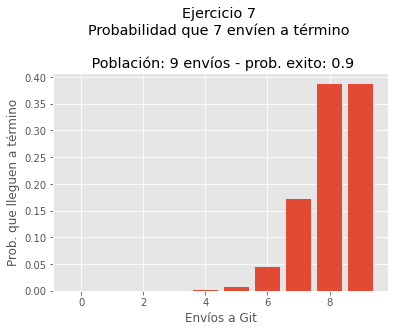

Probabilidad que hayan 7 envíos a término: 0.172187


In [209]:
resultado = Binomial(n=9,p=0.9,x=7)

# make data
x = np.linspace(0, 9, 10)
y = [Binomial(n=9,x=i,p=0.9)   for i in range(10)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 7 \nProbabilidad que 7 envíen a término \n\n Población: 9 envíos - prob. exito: 0.9')
plt.xlabel('Envíos a Git')
plt.ylabel('Prob. que lleguen a término')
plt.bar(x, y,width=0.8)
plt.show()

print('Probabilidad que hayan 7 envíos a término:',round(resultado,6))

## 8.
En relación con el enunciado anterior cálcule la probabilidad de que 7 o más lleguen a término.<br>
Distribución de Poisson:

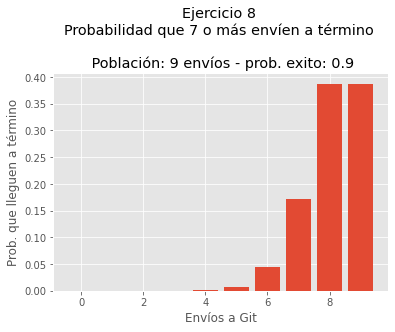

Probabilidad que hayan 7 o más envíos a término: 0.947028


In [211]:
resultado = Binomial(n=9,p=0.9,x=7)+Binomial(n=9,p=0.9,x=8)+Binomial(n=9,p=0.9,x=9)

# make data
x = np.linspace(0, 9, 10)
y = [Binomial(n=9,x=i,p=0.9)   for i in range(10)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 8 \nProbabilidad que 7 o más envíen a término \n\n Población: 9 envíos - prob. exito: 0.9')
plt.xlabel('Envíos a Git')
plt.ylabel('Prob. que lleguen a término')
plt.bar(x, y,width=0.8)
plt.show()

print('Probabilidad que hayan 7 o más envíos a término:',round(resultado,6))

## 9.
La cantidad de alumnos promedio que se ausentan en un día de clases en la carrera de Data Science es de 10. Calcular cual es la probabilidad de que se ausenten 7 alumnos.

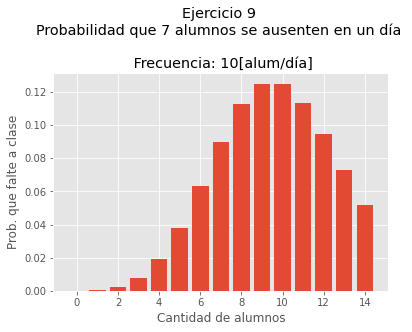

Probabilidad que se ausente 7 alumnos: 0.090079


In [212]:
resultado = Poisson(lamb=10,k=7)

# make data
x = np.linspace(0, 14, 15)
y = [Poisson(lamb=10,k=i)   for i in range(15)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 9 \nProbabilidad que 7 alumnos se ausenten en un día \n\n Frecuencia: 10[alum/día]')
plt.xlabel('Cantidad de alumnos')
plt.ylabel('Prob. que falte a clase')
plt.bar(x, y, linewidth=0.5)
plt.show()

print('Probabilidad que se ausente 7 alumnos:',round(resultado,6))

## 10. 
Cuando inicia una clase, los estudiantes ingresan a un ritmo de 5 estudiantes por minuto. Calcular cual es la probabilidad de que ingresen 7 estudiantes por minuto.

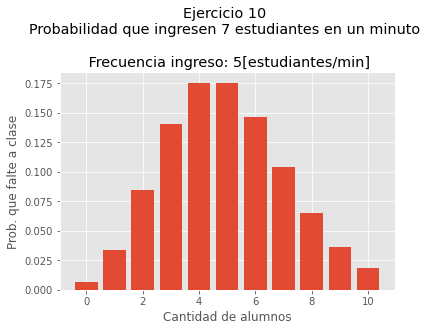

Probabilidad que se ausente 7 alumnos: 0.104445


In [213]:
resultado = Poisson(lamb=5,k=7)

# make data
x = np.linspace(0, 10, 11)
y = [Poisson(lamb=5,k=i)   for i in range(11)]
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title('Ejercicio 10 \nProbabilidad que ingresen 7 estudiantes en un minuto \n\n Frecuencia ingreso: 5[estudiantes/min]')
plt.xlabel('Cantidad de alumnos')
plt.ylabel('Prob. que falte a clase')
plt.bar(x, y, linewidth=0.5)
plt.show()

print('Probabilidad que se ausente 7 alumnos:',round(resultado,6))